In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from statsmodels.distributions.empirical_distribution import ECDF
from  inspect import getsource

def from_big_text(data:str,splitter:str,g:float = 0.9):
    
    index = pd.Index(f'''Объем выборки до удаления пропущенных данных
Количество пропущенных данных (NA)
Объем выборки после удаления пропущенных данных
Минимальное значение в вариационном ряду
Максимальное значение в вариационном ряду
Размах выборки
Значение первой квартили (Q1)
Значение медианы (Q2)
Значение третьей квартили (Q3)
Квартильный размах
Среднее выборочное значение
Стандартное отклонение (S) корень из дисп.в (исправленной)
Исправленная дисперсия 
Эксцесс
Коэффициент асимметрии
Ошибка выборки
Значение 63%-квантили
Мода
Как часто встречается "мода"
Верхняя граница нормы (Xst_max)
Нижняя граница нормы (Xst_min)
Количество выбросов ниже нижней нормы
Количество выбросов выше верхней нормы
Введите левую границу {g}-доверительного интервала для E(X)
Введите правую границу {g}-доверительного интервала для E(X)
Введите левую границу {g}-доверительного интервала для Var(X)
Введите правую границу {g}-доверительного интервала для Var(X)
'''.split('\n'))
    
    data_list=[]
    df=pd.DataFrame([float(i) if i!='NA' and i!='-NA' else np.nan for i in data.split(splitter)])
    
    length_before=df.size
    data_list.append(length_before)
    
    df=df.dropna()
    length_after=df.size
    data_list.extend([abs(length_after-length_before),length_after])
    
    minn=df.describe().loc['min'].values[0]
    maxx=df.describe().loc['max'].values[0]
    data_list.extend([minn,maxx,maxx-minn])
    
    Q1=df.describe().loc['25%'].values[0]
    Q2=df.describe().loc['50%'].values[0]
    Q3=df.describe().loc['75%'].values[0]
    
    mean = df.describe().loc['mean'].values[0]
    
    data_list.extend([Q1,Q2,Q3,Q3-Q1,mean,df.std(ddof=1,axis=0)[0],df.var(ddof=1)[0],df.kurt()[0],df.skew()[0]])
    
    data_list.append(data_list[11]/data_list[2]**0.5)
    data_list.extend(df.quantile(0.63))
    
    if df.mode().count()[0] == df.count().iloc[0]:
        data_list.append(0)
        data_list.append(0)
    else:
        data_list.append(df.mode().iloc[0,0])
        data_list.append(df.value_counts()[df.mode().iloc[0,0]])
        
    data_list.extend([data_list[8]+1.5*data_list[9],data_list[6]-1.5*data_list[9]])
    data_list.extend([len(df[df.iloc[:,0]<data_list[20]]),len(df[df.iloc[:,0]>data_list[19]])])
    
    z = scipy.stats.t.ppf((g+1)/2,length_after-1)
    sigma = df.std(ddof=1,axis=0)[0]
    delta = z * sigma/np.sqrt(length_after)

    data_list.extend([(mean-delta),(mean+delta)])

    z = scipy.stats.t.ppf((g+1)/2,length_after-1)
    sigma = df.std(ddof=1,axis=0)[0]
    var = sigma**2
    delta_R = length_after*var/scipy.stats.chi2.ppf((1-g)/2,length_after)
    delta_L = length_after*var/scipy.stats.chi2.ppf((1+g)/2,length_after)

    data_list.extend([delta_L,delta_R])

    df.boxplot()
    plt.xlabel('Ящик с усами до очистки')
    plt.show()

    clean_df=df[(df.iloc[:,0]>data_list[20]) & (df.iloc[:,0]<data_list[19])]
    clean_df.boxplot()
    plt.xlabel('Ящик с усами после очистки (Без NA и выбросов)')
    plt.show()
    
    res_df = pd.DataFrame(data_list,index[:len(data_list)], dtype=str)
    
    return res_df

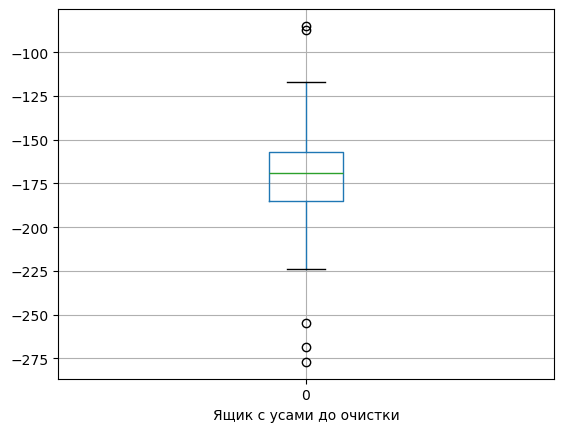

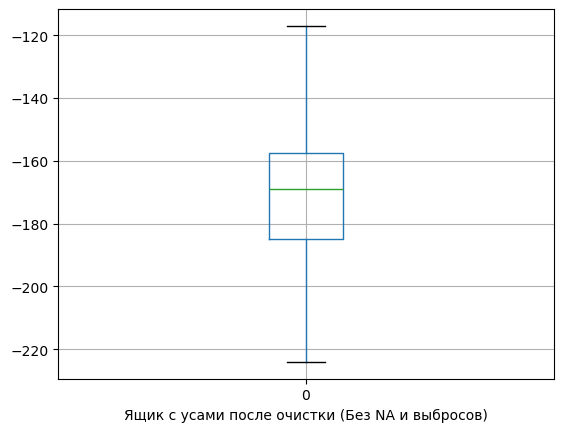

,0
Объем выборки до удаления пропущенных данных,300.0
Количество пропущенных данных (NA),21.0
Объем выборки после удаления пропущенных данных,279.0
Минимальное значение в вариационном ряду,-277.0064
Максимальное значение в вариационном ряду,-85.022
Размах выборки,191.9844
Значение первой квартили (Q1),-185.06304999999998
Значение медианы (Q2),-169.1902
Значение третьей квартили (Q3),-157.2754
Квартильный размах,27.787649999999985


In [31]:
text='-194.3779; -177.7017; NA; -190.9091; -170.5325; -168.1535; -197.1981; -122.5442; -181.6037; -196.2927; NA; -87.3432; -207.3771; -143.9177; -189.7354; -194.9819; -165.5695; -165.3043; 171.8495; -168.1425; -169.1902; -151.1296; -208.1701; -169.2235; -189.7955; NA; -172.3725; 183.0272; -221.2799; -139.1868; -160.088; -124.0217; -117.0158; -196.7869; -168.8747; 199.7569; -170.2329; -157.5982; -182.6017; NA; -198.2757; -173.3341; -197.0221; -176.617; 174.4793; -183.0195; -137.0551; -166.65; -161.1568; -204.9911; -137.6051; -85.022; -174.6369; -156.7334; -154.6654; -181.0034; -165.9679; -185.8001; -164.5037; -191.5906; -164.718; 205.4555; -160.3067; -212.2588; -161.5747; -189.3608; -146.8366; -194.0602; -166.7969; 191.3017; -162.0666; -168.4299; -210.1714; NA; -154.0824; -168.8861; -181.1642; -167.2657; 188.7629; -143.8932; -184.1726; -148.415; -163.2136; -179.3092; -158.3453; -152.927; 169.3517; -144.0586; -166.0867; -157.7147; -159.9157; -147.8518; -175.8872; -124.973; 149.9945; -255.031825; -130.5202; -209.4644; -125.7248; -165.9567; NA; -163.1068; -157.7618; -177.4579; -193.1898; -172.972; -172.5896; -145.9725; -164.5577; -124.0417; -160.3465; 134.8341; -161.6984; -165.9788; NA; -143.0549; -132.854; -137.7801; -193.0964; -184.9669; 151.5307; -185.057; -204.1557; -170.7604; -162.6274; -170.9198; -139.1593; -187.4823; 223.7508; -189.2962; -164.1744; -162.9236; -146.3165; NA; -163.4765; -163.3982; -163.5342; 198.4725; -202.5708; -178.5649; -224.0032; -168.6664; -195.6848; -158.2784; -132.0059; 162.5579; -143.5323; -175.7604; -177.9567; -151.2079; -125.5979; -187.1473; NA; -175.7593; 151.24; NA; -202.8399; -185.4153; -168.6321; -181.5665; -205.8899; -277.0064; NA; -173.3101; -128.5103; -172.5604; -154.2079; NA; -194.478; -161.6489; -163.2809; -176.994; -165.0078; 162.7372; -169.5874; -144.1649; -167.4255; -176.5829; -150.7951; -180.9425; -165.5115; 164.5462; -143.4277; -166.3309; -206.4914; -166.7015; -194.746; -148.9638; -191.2921; 169.9044; -186.2946; -215.7937; -149.0729; -146.4595; -189.1966; -165.4463; -212.4083; 186.8488; -165.2698; -146.8094; -185.0691; -159.2846; -124.6157; NA; -183.5672; -198.9645; 131.4182; NA; -196.0557; -202.8279; -164.7111; -140.1387; -184.423; -176.7473; -214.8683; 217.3961; -175.5419; -172.1291; -197.2019; -189.5526; -206.0636; -168.6153; -157.2746; 136.4666; -184.4911; -176.362; -161.5741; -177.9463; -172.3879; -172.095; -178.5666; 152.9071; NA; -176.4159; -162.2979; -161.6216; -182.6296; -173.2591; NA; -200.2; -131.9886; -173.4903; -174.1179; -143.78; -192.1052; NA; -155.9192; -156.6437; -157.2762; -144.4429; 147.86; NA; -177.8253; -175.6016; NA; -190.1326; -171.2815; -184.9209; -137.929; -164.9219; -175.851; -155.4942; -168.2686; -162.7573; -127.2019; -188.4408; -189.451; -189.4407; 161.4335; -219.0344; NA; -172.7585; -158.4946; -150.4887; -132.1469; -162.99; -169.8512; 162.7875; NA; -130.4107; -120.2871; -171.8417; -180.7133; -176.3202; -171.8288; -163.8611; 164.0547; -131.1598; -134.2916; -177.699; -268.3541; -154.5068; -167.0612; -136.12; -187.417; -170.5064; -134.3572; -179.4004; -187.3903; -203.872'
from_big_text(text.replace('; ','; -').replace('--','-'),'; ',0.9)

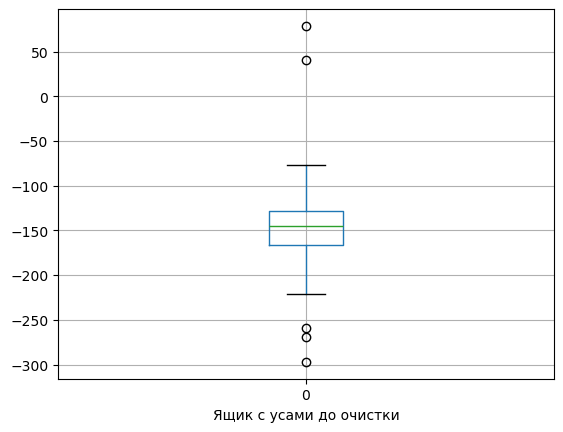

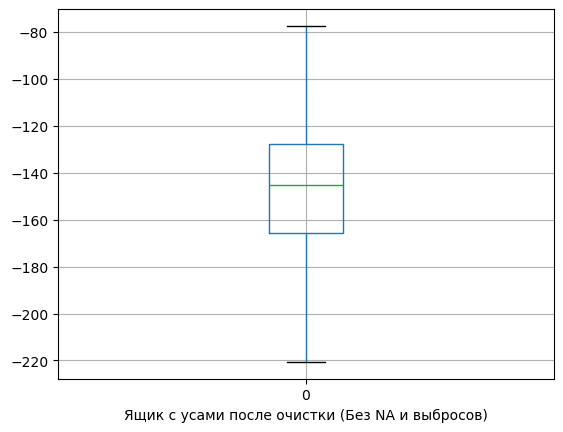

,0
Объем выборки до удаления пропущенных данных,300.0
Количество пропущенных данных (NA),24.0
Объем выборки после удаления пропущенных данных,276.0
Минимальное значение в вариационном ряду,-297.0968375
Максимальное значение в вариационном ряду,78.7044125
Размах выборки,375.80125
Значение первой квартили (Q1),-166.25865
Значение медианы (Q2),-145.60655
Значение третьей квартили (Q3),-127.837625
Квартильный размах,38.421024999999986


In [32]:
text='-143.6557; -97.3518; -220.6046; -162.3595; -127.7101; -86.1226; -127.8458; -116.2094; 78.7044125; -126.392; -162.2204; -151.825; -173.0673; -164.3944; -178.0095; -205.5445; -129.9543; -125.118; -176.9872; NA; -111.7849; -153.5577; -122.028; -142.9957; -133.5149; -147.1367; -136.8641; -268.948275; -149.2304; -115.9793; -103.2913; -150.984; -185.4504; -119.5425; -136.976; -169.8701; -166.3185; -149.4692; -115.9965; -133.9318; -141.2571; NA; -171.5901; -131.0935; -187.3362; -95.2587; -179.5124; NA; -203.2623; -124.7217; -154.8718; -146.7043; NA; -133.9199; -187.9599; -176.987; -118.4169; -111.8171; -183.4869; NA; -130.7014; -113.7935; -163.5563; -128.0331; -138.4724; -165.084; -171.8888; -148.1131; -139.0329; 41.1242875; -184.0022; -96.8565; -187.316; -135.3071; -297.0968375; NA; -160.0863; -126.2212; -135.1836; -151.2068; -157.1617; -154.4918; -158.9812; -210.1074; -111.5856; -157.1141; -158.9666; -145.9732; -193.342; NA; -101.184; -100.6822; -181.4282; -141.8452; -128.7117; -172.6348; -113.9092; NA; -139.3452; -148.0596; -145.2399; -150.4211; -80.0789; -128.5; -182.5515; -104.32; NA; -132.3741; -130.6553; -121.6725; -152.8959; -166.2387; -107.5462; -151.1811; -96.1534; -125.3718; -154.2727; -187.967; -127.1249; -187.0352; -133.7832; -131.6944; -114.9129; NA; NA; -123.8028; -215.6189; NA; -182.4182; -149.5489; -131.9397; -181.1457; -130.2081; -132.0474; NA; -137.6389; -151.5341; -152.1382; -190.5857; -175.9273; -149.6584; -126.3678; -170.1273; -136.4261; -161.8653; -191.599; -131.575; -108.317; -113.5587; -155.7655; -153.9817; -141.6352; -126.6624; -164.086; NA; -155.3999; -168.6013; -134.3741; -110.8876; -159.1739; -174.4021; -202.0555; -147.2622; -132.9385; -77.3666; -152.9521; -176.2541; -178.7834; NA; -146.2866; -126.9035; -165.9015; -130.691; -109.3452; -122.6457; -144.9958; -259.5167125; -144.2209; -172.8753; -147.3765; -90.0089; -138.4464; -122.3231; -179.6626; NA; -168.7264; -120.8311; -119.2482; -175.6909; -138.8324; -150.5358; -149.2879; -140.7198; NA; -150.792; -133.2211; -125.4456; -212.2818; -132.2899; -113.3291; -104.7275; -121.8885; -123.9298; -167.9484; -110.2948; -171.8559; -133.8495; -138.325; -136.7383; -161.3897; -146.1793; -147.0832; -154.5489; -162.95; -205.3008; NA; NA; -134.4678; -155.8443; -162.5978; -189.3095; -172.6418; -179.1521; -140.9419; -159.7677; -113.5288; -157.3867; -141.3394; NA; -136.5533; -106.7292; -142.6131; -134.8133; NA; -121.4852; -131.7341; -155.1888; -150.0969; -98.8223; -167.7577; -196.0335; -107.2524; -123.331; -130.6154; NA; -136.3118; -126.6777; -144.93; NA; -143.2798; -174.7984; -191.8673; NA; -172.0417; -172.289; -190.4658; -165.4547; -156.3501; -176.2215; -159.4576; -132.5118; -136.6862; -192.5846; -179.8278; -140.1382; -159.9185; -154.1684; -181.4175; -120.4195; -104.9919; -145.0474; -138.8152; -132.3195; -172.4664; -191.9385; -152.0547; -110.4722; -125.9318; -194.815; -162.7283; -155.4667; -135.641; -173.3116; -137.9201; -127.698; -127.8131; -132.1918; -137.648; -172.1477; -142.9456; -157.7452; -111.7427; -108.1417; -113.84; -154.1837; -146.4578; -160.8331; -186.8719; -135.6374; -173.6145'
from_big_text(text,'; ')

In [33]:
def name_task(text,splitter):
    
    data= pd.Series(list(map(int, text.split(splitter))))
    mu=data.mean()
    sigma = data.std(ddof=0)

    X=scipy.stats.norm(mu,sigma)

    L = X.ppf(0.25)
    H = X.ppf(0.75)

    lenLH = len(data[np.logical_and(data>=L,data<=H)])


    Fexp = ECDF(data)

    fig, ax = plt.subplots(figsize=(6,5))
    xx=np.linspace(X.ppf(0.01),X.ppf(0.99),1000)
    ax.plot(xx,X.cdf(xx))
    ax.plot(xx,Fexp(xx))
    plt.show()
    data_sort=np.sort(data)

    length_ff=max([max(np.abs((i+1)/len(data)-X.cdf(data_sort[i])),np.abs((i)/len(data)-X.cdf(data_sort[i]))) for i in range(len(data))]) # equals to scipy.stats.kstest(data,X.cdf)[0]

    dict_k=list(zip('среднее арифметическое ПД ,эмпирическое стандартное отклонение ПД ,квартиль L,квартиль Н,количество ПД от L до H,Расстояние мужду функциями распределения'.split(','),[mu,sigma,L,H,lenLH,length_ff]))
    for i in dict_k:
        print(i[0]+' = '+str(i[1]))


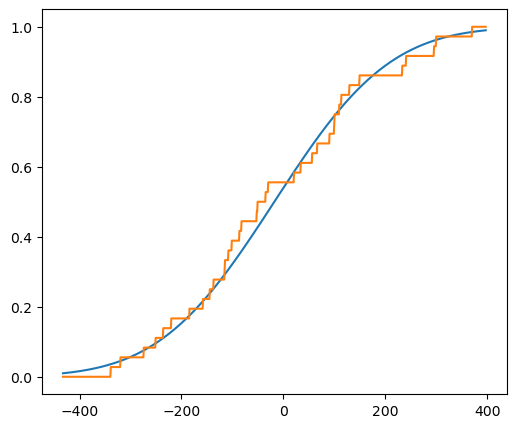

среднее арифметическое ПД  = -17.86111111111111
эмпирическое стандартное отклонение ПД  = 178.2157170986545
квартиль L = -138.06578561799813
квартиль Н = 102.34356339577592
количество ПД от L до H = 18
Расстояние мужду функциями распределения = 0.0870775276709288


In [34]:
text='295, −158, −51, 34, 109, −53, −185, 233, −251, −320, −274, −116, 370, −83, 149, 66, −108, −236, −87, −30, 113, −35, 56, −220, 20, −339, 90, 240, 100, −115, −137, 129, 99, −102, 299, −145'
name_task(text.replace('−', '-'),', ')